### Lv3 전처리 1/4 python 파이썬 이상치 탐지

Our data is not always clean and nice.<br>

Rather, it has outliers for sure. The outlier is the data that has problems. Usually, these outliers have weird patterns compared to other normal data.<br>

Sometimes these outliers make the performance of the model low. Thus, if we are going to focus on the normal data, we need to get rid of these outliers.<br>

A representative method is IQR(Interquantile Range), which uses the deviation of quartile values. We can view this using the boxplot graph.

In [1]:
# Download the data
!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-09-10 02:53:50--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2022-09-10 02:53:51--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 142.250.206.206, 2404:6800:400a:80b::200e
Connecting to drive.google.com (drive.google.com)|142.250.206.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g93d7rijj0qa5dubgnhuhl0bdbot453c/1662746025000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download&uuid=889ba0a1-9e02-444c-8b03-83b8ce4c1c13 [following]
--2022-09-10 02:53:51--  https://doc-10-10-docs.googleuserc

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Load train.csv, test.csv as a pandas DataFrame class
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
# Check the information, shape of the data frame
print('============ train data information ============')
print(train.info(), '\n')

# Check the shape of the data frame
print('train.shape: ', train.shape, '\n')

# Check the contents of the data frame for what it is for.
print(train.head(), '\n\n')

# Check the information, shape of the data frame
print('============ test data information ============')
print(test.info(), '\n')

# Check the shape of the data frame
print('test.shape: ', test.shape, '\n')

# Check the contents of the data frame for what it is for.
print(test.head())

============ train data information ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2

<AxesSubplot:>

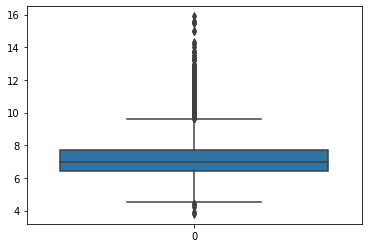

In [5]:
# Check if the data has the outliers
# We're going to use boxplot() method th see outliers in the 'fixed acidity' feature
sns.boxplot(data = train['fixed acidity'])

### Lv3 전처리 2/4 python 파이썬 이상치 제거

We're going to remove the outliers using IQR.<br>

IQR stands for Interquantile Range. It is the value between the first quartile(25%) and the third quartile(75%).<br>

For the above graph we just draw,<br>
- Solid line between 10 and 8: $3rd\;quartile + 1.5 \times IQR$<br>
- Solid upper line of blue box: $3rd\;quartile (75\%)$<br>
- Middle solid line in blue box: $quartile(median)$<br>
- Solid line below blue box: $1st\;quartile (25\%)$<br>
- Solid line between 4 and 6 : $1st\;quartile - 1.5 \times IQR$<br>
- Length of blue box: $3rd\;quartile - 1st\;quartile = IQR$<br>

We're going to judge the data points that are smaller than the solid line between 4 and 6, and larger than the solid line between 8 and 10 are the outliers, thus we will going to delete them.<br>

To do this, we're going to use `np.quantile()` method.<br>

A **quantile**(not quartile) is a point at which a given data is split into equal sizes. For example, if you take a test and want to see if you are in the top 10%, you can sort the score data and divide the number of data into 10 equal sizes, i.e. each group holds the same number of data.

In [6]:
# Get the values at 25%
quantile_25 = np.quantile(train['fixed acidity'], 0.25)

# Get the values at 75%
quantile_75 = np.quantile(train['fixed acidity'], 0.75)

In [7]:
# Put the discrepancy between the quantile_25 and the quantille_75 in variable 'IQR'.
IQR = quantile_75 - quantile_25

In [8]:
# Put the values smaller than quantile_25 in the variable 'minimum'.
minimum = quantile_25 - 1.5 * IQR

# Put the values greater than quantile_75% in the variable 'maximum'
maximum = quantile_75 + 1.5 * IQR

# Save only the values where "fixed acidity" is greater than minimum and less than maximum in "train2".
train2 = train[(minimum <= train['fixed acidity']) & (train['fixed acidity'] <= maximum)]

In [9]:
# Check the information, shape of the 'train2' data frame
print('============ train2 data information ============')
print(train2.info(), '\n')

# Check the shape of the 'train2' data frame
print('train2.shape: ', train2.shape, '\n')

# Check the contents of the 'train2' data frame for what it is for.
print(train2.head())

============ train2 data information ============
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5203 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5203 non-null   int64  
 1   quality               5203 non-null   int64  
 2   fixed acidity         5203 non-null   float64
 3   volatile acidity      5203 non-null   float64
 4   citric acid           5203 non-null   float64
 5   residual sugar        5203 non-null   float64
 6   chlorides             5203 non-null   float64
 7   free sulfur dioxide   5203 non-null   float64
 8   total sulfur dioxide  5203 non-null   float64
 9   density               5203 non-null   float64
 10  pH                    5203 non-null   float64
 11  sulphates             5203 non-null   float64
 12  alcohol               5203 non-null   float64
 13  type                  5203 non-null   object 
dtypes: float64(11), int64(

In [10]:
# Check how many outliers were removed from the original data
print(train.shape[0] - train2.shape[0])

294


<AxesSubplot:>

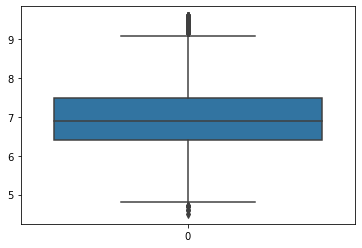

In [11]:
# Let's visualize the train2 data frame
sns.boxplot(data = train2['fixed acidity'])